In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [ ]:
df = pd.read_csv("train.csv")

In [4]:
df.shape

(404290, 6)

In [7]:
df.sample(5)


,id,qid1,qid2,question1,question2,is_duplicate
133850,133850,82827,19640,How do I recover a lost Gmail password?,My Gmail account is not working. I forgot my p...,0
235212,235212,345876,345877,What if you don't want to belong to any nation...,Is it possible to love someone if you don't wa...,0
12866,12866,24747,24748,Do you think African leaders have learnt from ...,Do you believe that most of the MNC'S in in In...,0
166759,166759,49315,258684,How can someone be active on messenger and not...,Somebody hacked my WhatsApp account and receiv...,0
138895,138895,221076,221077,What is the salary for an Android developer wi...,What is the salary for an Android developer wi...,0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404290 entries, 0 to 404289
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            404290 non-null  int64 
 1   qid1          404290 non-null  int64 
 2   qid2          404290 non-null  int64 
 3   question1     404289 non-null  object
 4   question2     404288 non-null  object
 5   is_duplicate  404290 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 18.5+ MB


#Missing values

In [9]:
df.isnull().sum()

id              0
qid1            0
qid2            0
question1       1
question2       2
is_duplicate    0
dtype: int64

In [10]:
df.duplicated().sum()

0

is_duplicate
0    255027
1    149263
Name: count, dtype: int64
is_duplicate
0    63.080215
1    36.919785
Name: count, dtype: float64


<Axes: xlabel='is_duplicate'>

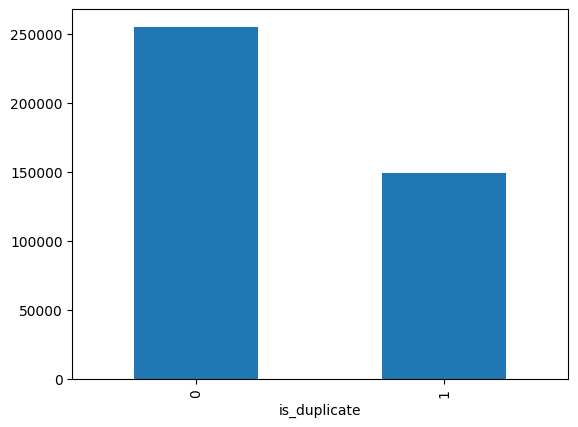

In [ ]:
# Distribution of the target variable
print(df["is_duplicate"].value_counts())
print((df["is_duplicate"].value_counts() / df["is_duplicate"].count()) * 100)
df["is_duplicate"].value_counts().plot(kind="bar")


In [22]:
# Number of unique questions and repeated questions

# Number of unique questions and repeated questions

qid_series = pd.Series(df["qid1"].tolist() + df["qid2"].tolist())
unique_qid_count = qid_series.nunique()
print("Number of unique Questions", unique_qid_count)
x = qid_series.value_counts() > 1
print("Number of repeated Questions", x[x].shape[0])

Number of unique Questions 537933
Number of repeated Questions 111780


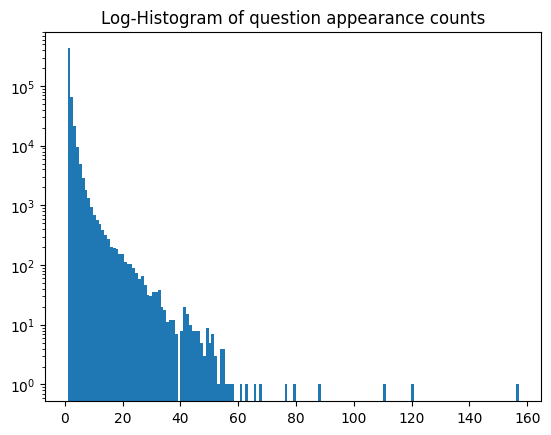

In [ ]:
# Repeated questions histogram
plt.hist(qid_series.value_counts().values, bins=160)
plt.title("Log-Histogram of question appearance counts")
plt.yscale("log")
plt.show()
